In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#pd.options.display.float_format = '{:.1f}'.format  # 1 decimal only for float numbers display
#np.set_printoptions(suppress=True)

holidays_events = pd.read_csv("./database/holidays_events.csv", parse_dates=['date'])
test = pd.read_csv("./database/test.csv",parse_dates=['date'])
transactions = pd.read_csv("./database/transactions.csv",parse_dates=['date'])
stores = pd.read_csv("./database/stores.csv")
oil = pd.read_csv("./database/oil.csv",parse_dates=['date'])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [2]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
date           350 non-null datetime64[ns]
type           350 non-null object
locale         350 non-null object
locale_name    350 non-null object
description    350 non-null object
transferred    350 non-null bool
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
date            83488 non-null datetime64[ns]
store_nbr       83488 non-null int64
transactions    83488 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [5]:
oil.rename(columns={'dcoilwtico':'oilprice'},inplace=True)

oil.head()


,date,oilprice
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [14]:
oil = oil.dropna(subset=['oilprice'])

In [15]:
oil.to_csv('oil_filtered.csv', index=True)

In [16]:
oil.head()

,date,oilprice
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [17]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
store_nbr    54 non-null int64
city         54 non-null object
state        54 non-null object
type         54 non-null object
cluster      54 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [21]:
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
date            83488 non-null datetime64[ns]
store_nbr       83488 non-null int64
transactions    83488 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [23]:
train = pd.read_csv("./database/train.csv",parse_dates=['date'])
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
id             int64
date           datetime64[ns]
store_nbr      int64
family         object
sales          float64
onpromotion    int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [25]:
sample_submission = pd.read_csv("./database/sample_submission.csv")
sample_submission.head()


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [33]:
sample_submission.isnull().sum() # verifier qu'il y'a aps de donnees manquants sur la serie

id       0
sales    0
dtype: int64

In [34]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [35]:
#Check for missing values
if train.isnull().values.any():
    print("Der Datensatz ist unvollständig. Es fehlen Werte.")
else:
    print("Der Datensatz ist vollständig")

Der Datensatz ist vollständig


In [36]:
# Checking for completeness of the dates
train.date.min(), train.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [37]:
#Actual recorded number of days in tarin dataset
train['date'].nunique()

1684

In [39]:
# range between min and max
min_date = train['date'].min()
max_date = train['date'].max()
days_range = pd.date_range(start=min_date, end=max_date)
num_days =len(days_range)
num_days

1688

In [40]:
expected_dates =pd.date_range(start=min_date, end=max_date)
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [44]:
#missing dates
missing_dates =expected_dates.difference(train['date'].unique())
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [47]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots


In [48]:
train_copy = train.copy()
train_copy['year'] = train_copy['date'].dt.year
max_sales = train_copy.groupby('year')['sales'].idxmax()
Result_max = train.loc[max_sales]
print(Result_max)

              id       date  store_nbr     family       sales  onpromotion
562596    562596 2013-11-12         44  GROCERY I   46271.000            0
1257246  1257246 2014-12-08         35  GROCERY I   45361.000            3
1916586  1916586 2015-12-14         35  GROCERY I   40351.460            7
2163723  2163723 2016-05-02          2  GROCERY I  124717.000           59
2760297  2760297 2017-04-02          9  GROCERY I   38422.625           73


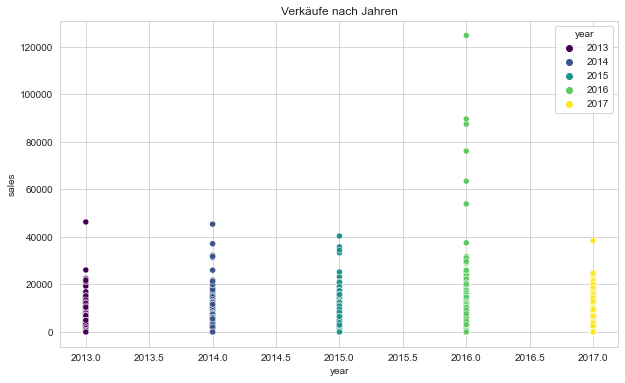

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='sales', data=train_copy, hue='year', palette='viridis')
plt.title('Verkäufe nach Jahren')
plt.show()